In [2]:
import pandas as pd
import numpy as np


data = pd.read_csv(r'C:\Users\user\Downloads\USArrests.csv')
df = pd.DataFrame(data)
X = df[["Murder", "Assault", "UrbanPop", "Rape"]]


In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [7]:
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

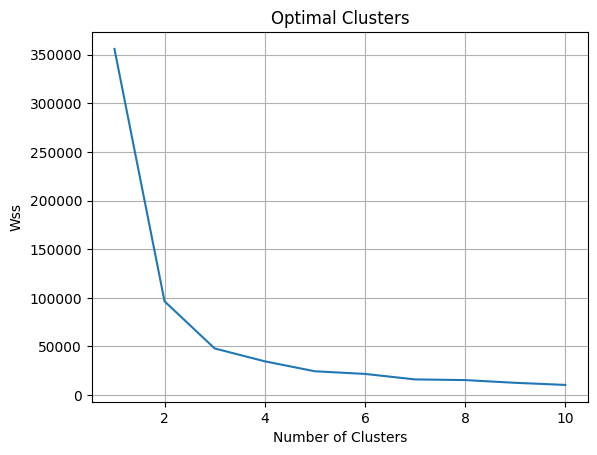

In [10]:
plt.plot(range(1, 11), wss)
plt.title("Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Wss")
plt.grid()
plt.show()

In [11]:
km = KMeans(n_clusters=3,n_init=10)

In [13]:
km.fit(X)

KMeans(n_clusters=3, n_init=10)

In [14]:
cluster_label = km.predict(X)

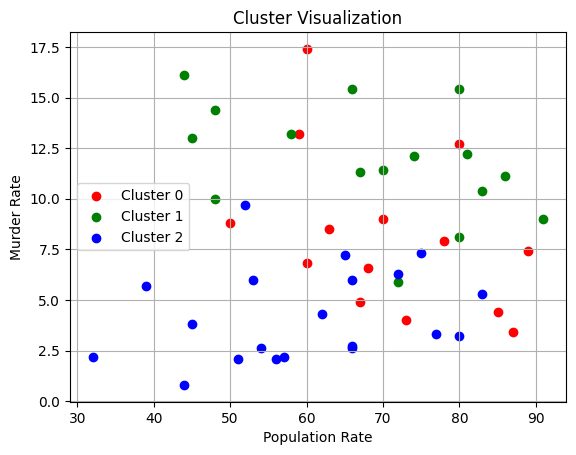

In [21]:
import matplotlib.pyplot as plt
colors = ['r', 'g', 'b']
for i in range(max(cluster_label) + 1):
    cluster_data = X[cluster_label == i]   
    plt.scatter(cluster_data['UrbanPop'], cluster_data['Murder'], c=colors[i], label=f'Cluster {i}')
plt.xlabel("Population Rate")
plt.ylabel("Murder Rate")
plt.legend()
plt.title("Cluster Visualization")
plt.grid(True)
plt.show()


In [22]:
from scipy.cluster.hierarchy import linkage 
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [24]:
mergings = linkage(X,method="ward")

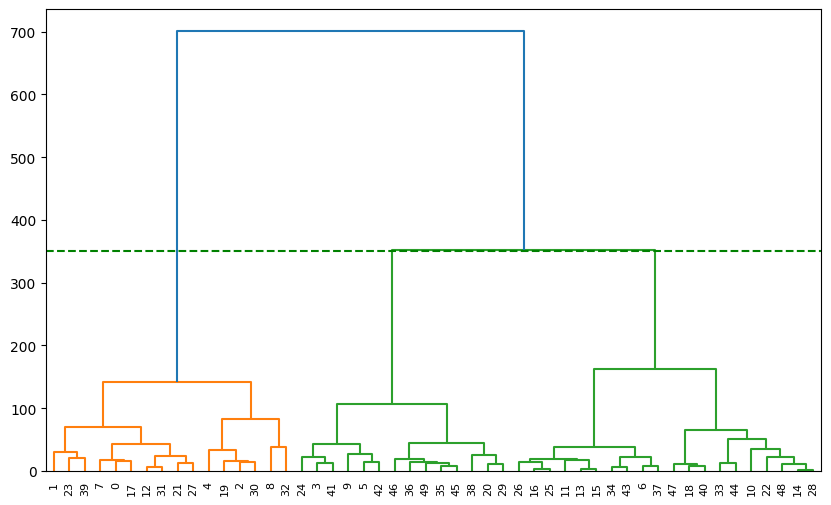

In [25]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(350,color='green',linestyle='--')
plt.show()

In [28]:
cluster_labels = fcluster(mergings,350,criterion='distance')

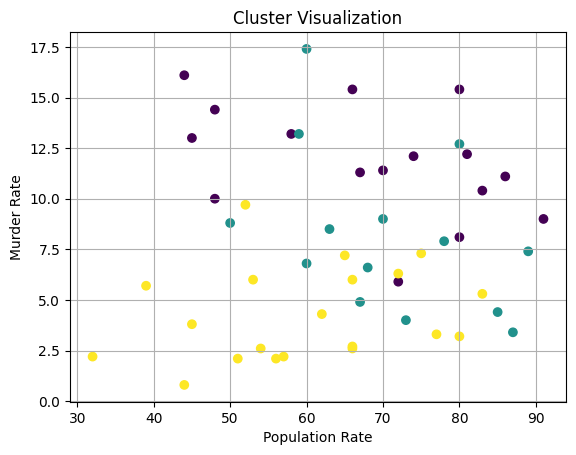

In [35]:
plt.scatter(X['UrbanPop'], X['Murder'],c=cluster_labels)
plt.xlabel("Population Rate")
plt.ylabel("Murder Rate")
plt.title("Cluster Visualization")
plt.grid(True)
plt.show()